In [3]:
import numpy as np
import pandas as pd
import scipy
import imageio
import math
import phylo

from PIL import Image
from sklearn.linear_model import LogisticRegression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
plt.style.use("seaborn-whitegrid")

In [2]:
%load_ext blackcellmagic

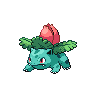

In [8]:
ivy_im = phylo.load_img("../images/ivysaur.png")
ivy_vec = phylo.vectorize(ivy_im)
ivy_im

In [24]:
np.random.seed(42)
AF = 20
AT = 1
at_list = [ivy_vec]
af_list = [phylo.generate_random() for i in range(AF)]
X = np.array(af_list + at_list)
y = np.array([0.0 for i in range(AF)] + [1.0 for i in range(AT)])
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
print("Mean Accuracy = {0:.3f}".format(clf.score(X, y)))

Mean Accuracy = 1.000


In [27]:
cands = clf.predict([phylo.generate_random() for i in range(10000)])

In [28]:
max(cands)

0.0